# **Data and Libraries**

In [ ]:
# Importing necessary libraries

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import cv2

from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [ ]:
print(tf.__version__)

2.4.1


In [ ]:
# Mounting google drive

from google.colab import drive          
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Testing if GPU exists

tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
# Checking specifications of CPU & GPU

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 594331754703450017
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11145797952
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13896249631923090638
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


In [ ]:
# Using Image data generator from keras to handle the training as well as testing data

from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator()
test_generator = ImageDataGenerator()

path = '/content/drive/MyDrive/Datasets/mechanical_parts_dataset'
train_iterator = train_generator.flow_from_directory(path+'/training',target_size=(128,128),class_mode = 'sparse',batch_size=64)
test_iterator = test_generator.flow_from_directory(path+'/testing',target_size=(128,128),class_mode = 'sparse',batch_size=1)

Found 21130 images belonging to 4 classes.
Found 1524 images belonging to 4 classes.


# **Model-fromScratch**

In [ ]:
# Building CNN model from scratch 

def MechanicalModel():

  X_input = Input((128,128,3))
  X = ZeroPadding2D((3,3))(X_input)
  X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
  X = BatchNormalization(axis = 3, name = 'bn0')(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2, 2), strides = (2, 2), name = 'Max_Pool0')(X)
  
  X = ZeroPadding2D((3,3))(X)
  X = Conv2D(64, (7, 7), strides = (1, 1), name = 'conv1')(X)
  X = BatchNormalization(axis = 3, name = 'bn1')(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2, 2), strides = (2, 2), name = 'Max_Pool1')(X)
  
  X = ZeroPadding2D((3,3))(X)
  X = Conv2D(64, (7, 7), strides = (1, 1), name = 'conv2')(X)
  X = BatchNormalization(axis = 3, name = 'bn2')(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2, 2), strides = (2, 2), name = 'Max_Pool2')(X)

  X = ZeroPadding2D((3,3))(X)
  X = Conv2D(128, (7, 7), strides = (1, 1), name = 'conv3')(X)
  X = BatchNormalization(axis = 3, name = 'bn3')(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2, 2), strides = (2, 2), name = 'Max_Pool3')(X)
  
  X = Flatten()(X)
  X = Dense(4, activation = 'softmax', name = 'fc')(X)
  print(X)
  model = tf.keras.Model(inputs = X_input, outputs = X, name = 'MechanicalModel')

  return model

In [ ]:
# Compiling the model and storing it in mechanicalmodel

mechanicalmodel = MechanicalModel()

mechanicalmodel.compile(optimizer = 'adam', loss = tf.keras.losses.sparse_categorical_crossentropy, metrics = ["accuracy"])

KerasTensor(type_spec=TensorSpec(shape=(None, 4), dtype=tf.float32, name=None), name='fc/Softmax:0', description="created by layer 'fc'")


In [ ]:
# Training the model

model_history = mechanicalmodel.fit_generator(
    train_iterator, 
    epochs=20,
    validation_data=test_iterator
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
331/331 [==============================] - 135s 409ms/step - loss: 0.5042 - accuracy: 0.8073 - val_loss: 2.6458 - val_accuracy: 0.3432
Epoch 2/20
331/331 [==============================] - 39s 118ms/step - loss: 0.4028 - accuracy: 0.8474 - val_loss: 2.3791 - val_accuracy: 0.4856
Epoch 3/20
331/331 [==============================] - 39s 118ms/step - loss: 0.3486 - accuracy: 0.8703 - val_loss: 2.5199 - val_accuracy: 0.5682
Epoch 4/20
331/331 [==============================] - 40s 121ms/step - loss: 0.2786 - accuracy: 0.8947 - val_loss: 1.4271 - val_accuracy: 0.6929
Epoch 5/20
331/331 [==============================] - 39s 117ms/step - loss: 0.2281 - accuracy: 0.9158 - val_loss: 1.9292 - val_accuracy: 0.4724
Epoch 6/20
331/331 [==============================] - 39s 118ms/step - loss: 0.1801 - accuracy: 0.9336 - val_loss: 2.6917 - val_accuracy: 0.4744
Epoch 7/20
331/331 [==============================] - 39s 117ms/step - loss: 0.1553 - accuracy: 0.9418 - val_loss: 2.1323 - val_a

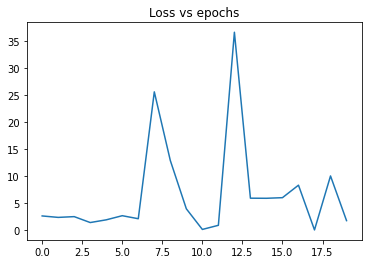

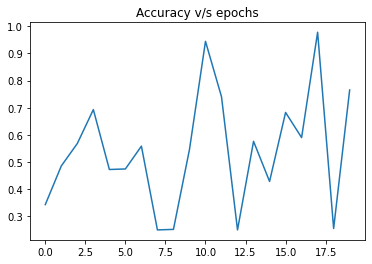

In [ ]:
# Plotting the graphs of validation loss and validation accuracy vs epochs

accuracy = model_history.history['val_accuracy']
loss = model_history.history['val_loss']
x = np.arange(len(loss))

plt.plot(x,loss)
plt.title('Loss vs epochs')
plt.show()

plt.plot(x, accuracy)
plt.title('Accuracy v/s epochs')
plt.show()

In [ ]:
# Defining a function that tests on a custom image using image path

# First we identify the actual class labels and what their corresponding index in the model
labels = train_iterator.class_indices
labels = dict((v,k) for k,v in labels.items())

def mechanical_parts_predictor(path):
  x_test_image =  cv2.imread(path)
  resized_test = cv2.resize(x_test_image,(128,128))

  list_of_test_images = []
  list_of_test_images.append(resized_test)
  test_image = np.array(list_of_test_images)

  prediction = mechanicalmodel.predict_generator(test_image)
  print(prediction)
  predicted_class_index = np.argmax(prediction)
  # predictions = 
  return labels[predicted_class_index]

In [ ]:
# We test using a sample image

test_image_path = '/content/pin2.png'
part = mechanical_parts_predictor(test_image_path)
print("The given image is of " + part)

[[6.7462701e-01 2.2120979e-01 1.0416172e-01 1.3801437e-06]]
The given image is of bolt


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


# **VGG** 

For purposes of comparison with standard models, we use pretrained VGG16 

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,MaxPooling2D,Flatten,BatchNormalization,AveragePooling2D
from keras.applications.vgg16 import VGG16


vgg_model = VGG16(input_shape=(128,128,3),include_top=False,weights='imagenet')
model = Sequential()

model.add(vgg_model)

model.add(Flatten())
model.add(Dense(4,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=1e-3), metrics=['accuracy'])

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
model_history = model.fit_generator(
    train_iterator, 
    epochs=20,
    validation_data=test_iterator,
    steps_per_epoch = 64
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
64/64 [==============================] - 1228s 19s/step - loss: 1.3869 - accuracy: 0.2686 - val_loss: 1.3448 - val_accuracy: 0.3944
Epoch 2/20
64/64 [==============================] - 665s 10s/step - loss: 1.1476 - accuracy: 0.4502 - val_loss: 0.6573 - val_accuracy: 0.7073
Epoch 3/20
64/64 [==============================] - 524s 8s/step - loss: 0.7968 - accuracy: 0.6443 - val_loss: 0.6731 - val_accuracy: 0.7218
Epoch 4/20
64/64 [==============================] - 440s 7s/step - loss: 0.7165 - accuracy: 0.6987 - val_loss: 0.5958 - val_accuracy: 0.7579
Epoch 5/20
64/64 [==============================] - 349s 5s/step - loss: 0.6562 - accuracy: 0.7336 - val_loss: 0.4998 - val_accuracy: 0.8196
Epoch 6/20
64/64 [==============================] - 281s 4s/step - loss: 0.5926 - accuracy: 0.7656 - val_loss: 0.4340 - val_accuracy: 0.8478
Epoch 7/20
64/64 [==============================] - 229s 4s/step - loss: 0.5610 - accuracy: 0.7847 - val_loss: 0.4037 - val_accuracy: 0.8497
Epoch 8/20

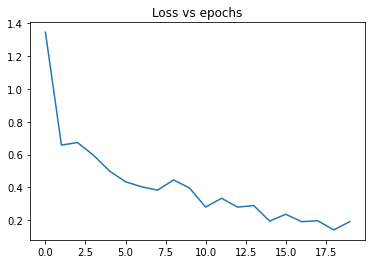

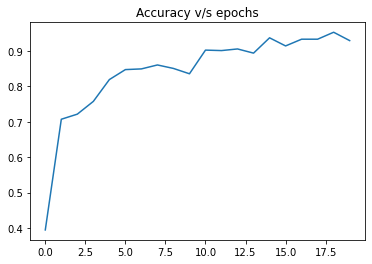

In [ ]:
# Plotting the graphs of validation loss and validation accuracy vs epochs

accuracy = model_history.history['val_accuracy']
loss = model_history.history['val_loss']
x = np.arange(len(loss))

plt.plot(x,loss)
plt.title('Loss vs epochs')
plt.show()

plt.plot(x, accuracy)
plt.title('Accuracy v/s epochs')
plt.show()

In [ ]:
# Saving the model weights for future use

# model.save_weights('/content/drive/MyDrive/Datasets')
# model.save('model.h5')

In [ ]:
# Copying the model that was saved in the temporary content to the drive destination

# %cp /content/model.h5 /content/drive/MyDrive/Datasets

In [ ]:
# Loading the saved model weights 

model.load_weights('/content/drive/MyDrive/Datasets/model.h5')

In [ ]:
# Saving the model weights in tf format 

model.save_weights('./model_weight_tf.tf',save_format='tf')

In [ ]:
# Loading the tf format weights

# model.load_weights('/content/model_weight_tf.tf.index')

In [ ]:
# Defining a function that tests on a custom image using image path

# First we identify the actual class labels and what their corresponding index in the model
# labels = train_iterator.class_indices
labels = {'bolt': 0, 'locatingpin': 1, 'nut': 2, 'washer': 3}
print("The corresponding classes and indices are ")
print(labels)
labels = dict((v,k) for k,v in labels.items())

def mechanical_parts_predictor(path):
  x_test_image =  cv2.imread(path)
  resized_test = cv2.resize(x_test_image,(128,128))
  list_of_test_images = []
  list_of_test_images.append(resized_test)
  test_image = np.array(list_of_test_images)
  prediction = model.predict_generator(test_image)
  print("The prediction probabilities are ")
  print(prediction)
  predicted_class_index = np.argmax(prediction)
  return labels[predicted_class_index]

The corresponding classes and indices are 
{'bolt': 0, 'locatingpin': 1, 'nut': 2, 'washer': 3}


The prediction probabilities are 
[[0.8018068  0.19124196 0.00394446 0.00300681]]
The given image is of bolt


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


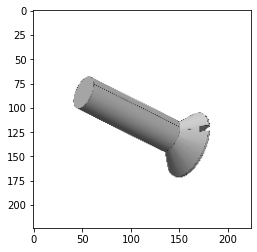

In [ ]:
# We test using a sample image

test_image_path = '/content/bolt.png'
display_image = cv2.imread(test_image_path)
plt.imshow(display_image)
part = mechanical_parts_predictor(test_image_path)
print("The given image is of " + part)